# Análise  e Previsão de Atrasos em Voos 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import joblib as jb

In [2]:
df = pd.read_csv('data/flights.csv', low_memory=False)

In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   FLIGHT_NUMBER        5819079 non-null  int64  
 6   TAIL_NUMBER          5804358 non-null  object 
 7   ORIGIN_AIRPORT       5819079 non-null  object 
 8   DESTINATION_AIRPORT  5819079 non-null  object 
 9   SCHEDULED_DEPARTURE  5819079 non-null  int64  
 10  DEPARTURE_TIME       5732926 non-null  float64
 11  DEPARTURE_DELAY      5732926 non-null  float64
 12  TAXI_OUT             5730032 non-null  float64
 13  WHEELS_OFF           5730032 non-null  float64
 14  SCHEDULED_TIME       5819073 non-null  float64
 15

In [4]:
df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

In [5]:
df[['ARRIVAL_DELAY', 'IS_DELAYED']].head(10)

,ARRIVAL_DELAY,IS_DELAYED
0,-22.0,0
1,-9.0,0
2,5.0,0
3,-9.0,0
4,-21.0,0
5,8.0,0
6,-17.0,0
7,-10.0,0
8,-13.0,0
9,-15.0,0


In [6]:
df = df.dropna(subset=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'])

In [7]:
colunas_para_remover = ['YEAR', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df = df.drop(colunas_para_remover, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   ORIGIN_AIRPORT       object 
 5   DESTINATION_AIRPORT  object 
 6   SCHEDULED_DEPARTURE  int64  
 7   SCHEDULED_TIME       float64
 8   DISTANCE             int64  
 9   SCHEDULED_ARRIVAL    int64  
 10  IS_DELAYED           int32  
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 501.3+ MB


In [9]:
df = df.sample(n=100000, random_state=42)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3335058 to 1586578
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY                  100000 non-null  int64  
 2   DAY_OF_WEEK          100000 non-null  int64  
 3   AIRLINE              100000 non-null  object 
 4   ORIGIN_AIRPORT       100000 non-null  object 
 5   DESTINATION_AIRPORT  100000 non-null  object 
 6   SCHEDULED_DEPARTURE  100000 non-null  int64  
 7   SCHEDULED_TIME       100000 non-null  float64
 8   DISTANCE             100000 non-null  int64  
 9   SCHEDULED_ARRIVAL    100000 non-null  int64  
 10  IS_DELAYED           100000 non-null  int32  
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 8.8+ MB


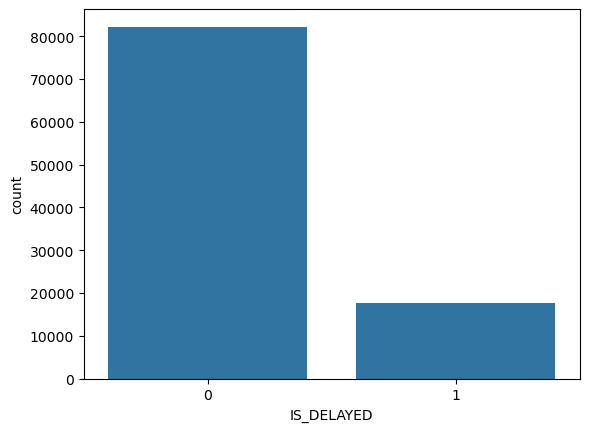

In [11]:
df['IS_DELAYED'].value_counts(normalize=True)
sns.countplot(x='IS_DELAYED', data=df)
plt.show()

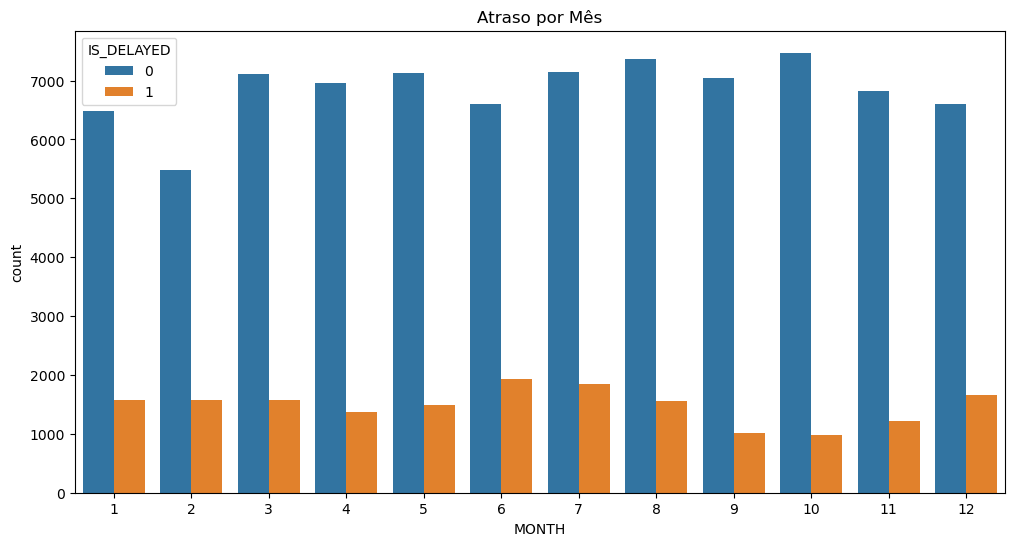

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MONTH', hue='IS_DELAYED', data=df)
plt.title('Atraso por Mês')
plt.show()

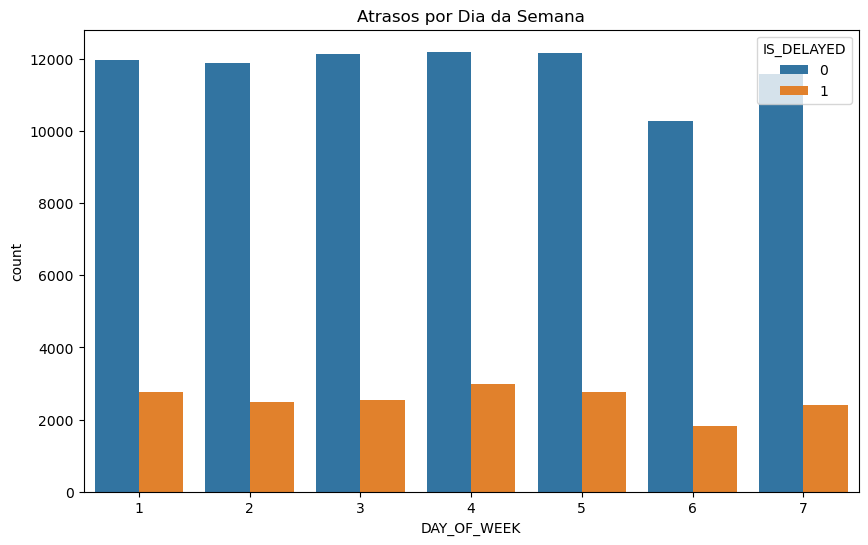

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_OF_WEEK', hue='IS_DELAYED', data=df)
plt.title('Atrasos por Dia da Semana')
plt.show()

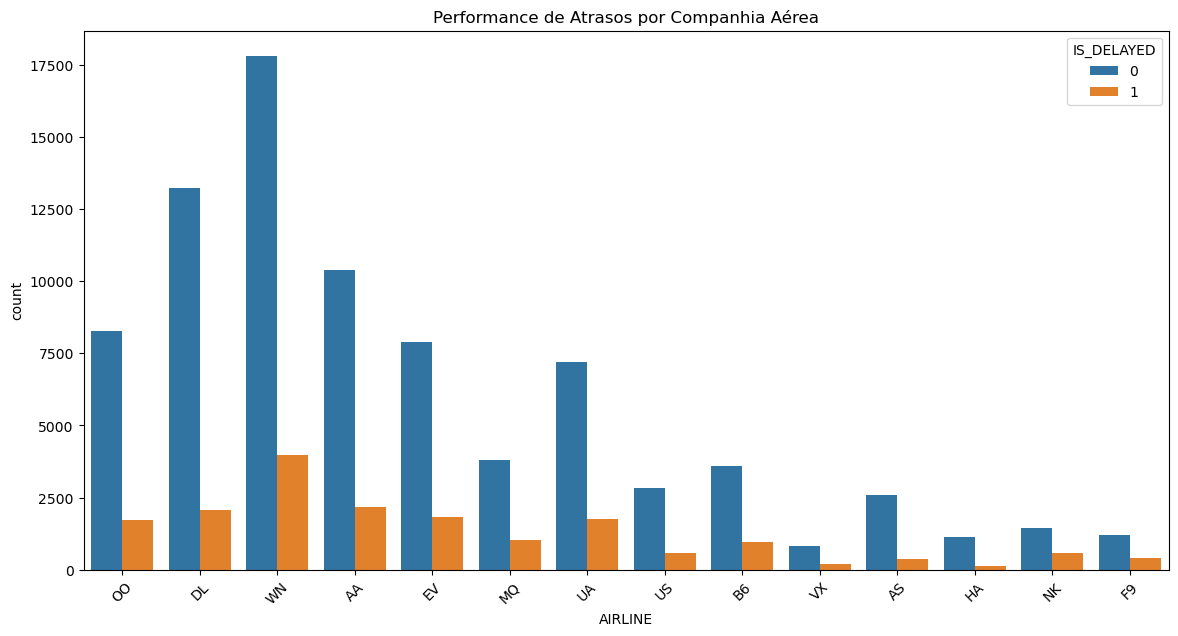

In [14]:
plt.figure(figsize=(14, 7))
sns.countplot(x='AIRLINE', hue='IS_DELAYED', data=df)
plt.title('Performance de Atrasos por Companhia Aérea')
plt.xticks(rotation=45)
plt.show()

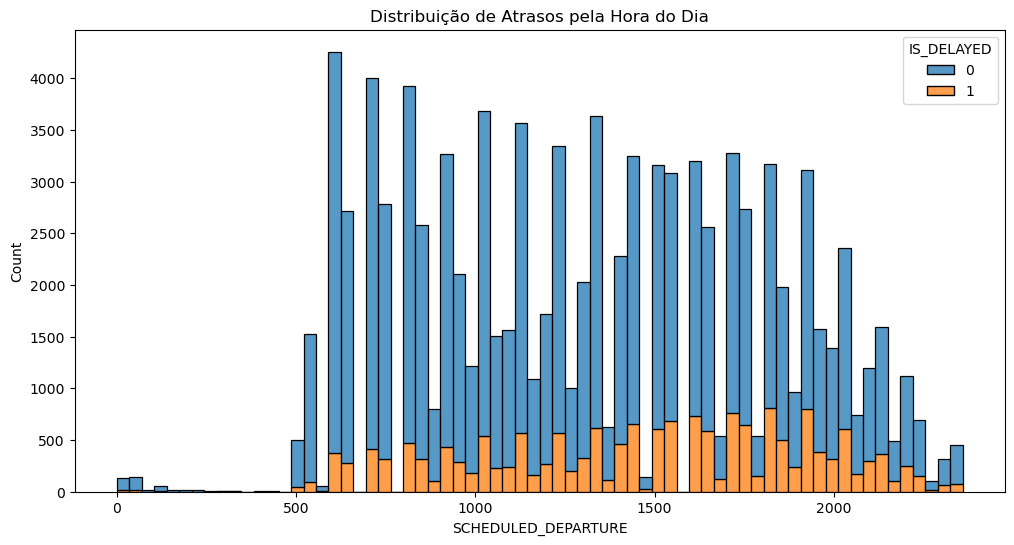

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='SCHEDULED_DEPARTURE', hue='IS_DELAYED', multiple='stack')
plt.title('Distribuição de Atrasos pela Hora do Dia')
plt.show;

In [16]:
y = df['IS_DELAYED']
x = df.drop('IS_DELAYED', axis=1)
x = x.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1)
x_encoded = pd.get_dummies(x, drop_first=True)

In [17]:
x_encoded.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
3335058,7,27,1,1623,75.0,318,1638,False,False,False,False,False,False,False,False,True,False,False,False,False
4857110,10,30,5,1823,165.0,950,2108,False,False,True,False,False,False,False,False,False,False,False,False,False
4454180,10,5,1,1150,115.0,672,1345,False,False,False,False,False,False,False,False,False,False,False,False,True
5132772,11,17,2,1305,62.0,214,1407,False,False,True,False,False,False,False,False,False,False,False,False,False
4075015,9,11,5,600,60.0,224,700,False,False,False,False,False,False,False,False,True,False,False,False,False


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [21]:
y_pred = model.predict(x_test_scaled)

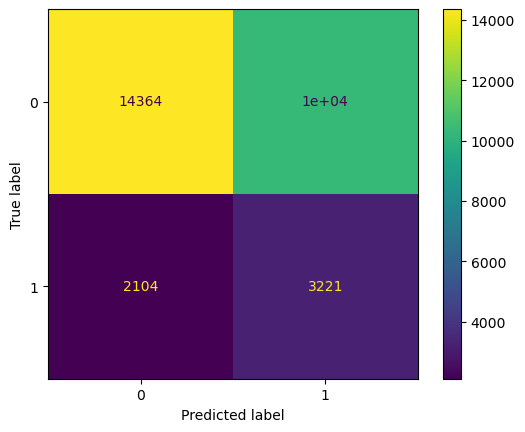

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.58      0.70     24675
           1       0.24      0.60      0.34      5325

    accuracy                           0.59     30000
   macro avg       0.56      0.59      0.52     30000
weighted avg       0.76      0.59      0.63     30000



In [24]:
jb.dump(model, 'modelo_atraso_voo.joblib')
jb.dump(scaler, 'scaler_voo.joblib')

['scaler_voo.joblib']

## ✅ Conclusões da Modelagem e Próximos Passos

Após a limpeza e preparação dos dados, um modelo de **Regressão Logística** foi treinado com o parâmetro `class_weight='balanced'` para lidar com o desbalanceamento entre voos pontuais e atrasados.

### Performance do Modelo

A avaliação no conjunto de teste revelou um trade-off clássico em problemas de classificação:

*   **Acurácia Geral:** O modelo alcançou **59%** de acurácia. Este valor mais baixo é esperado, pois forçamos o modelo a não simplesmente "chutar" a classe majoritária.
*   **Performance na Detecção de Atrasos (Classe `1`):**
    *   🎯 **Recall de 60%:** Este é o nosso resultado mais importante! O modelo conseguiu identificar com sucesso **60% de todos os voos que realmente atrasaram**. Para uma operação aeroportuária, isso significa que fomos avisados de mais da metade dos problemas antes que eles acontecessem.
    *   ⚠️ **Precisão de 24%:** A consequência de um recall mais alto foi uma precisão mais baixa. Isso significa que, para cada 4 voos que o modelo sinalizou como "possível atraso", apenas 1 deles de fato atrasou. O modelo gera um número considerável de "alarmes falsos".

### Decisão de Negócio

Para uma companhia aérea, o custo de um **atraso não previsto** (um Falso Negativo, que o recall ajuda a evitar) é geralmente muito maior do que o custo de se preparar para um atraso que não acontece (um Falso Positivo, que a baixa precisão gera). Portanto, **o modelo atual, que prioriza o Recall, é útil e valioso para o negócio.**

### Próximo Passo

Com o modelo e o scaler devidamente salvos (`.joblib`), a etapa de análise e treinamento está concluída. O próximo passo será utilizar esses artefatos para construir uma aplicação web interativa com **Streamlit**, permitindo que a equipe de operações utilize o modelo para fazer previsões em tempo real.